In October 2015, Walt Hickey from FiveThirtyEight published a popular [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) where he presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. 

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
import matplotlib.style as style
%matplotlib inline

### Reading Data
`fandango_score_comparison`: This dataset contains info related to Hickey's Analysis.

`movie_ratings_16_17.csv`: This dataset contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

   - `movie`: 	    The name of the movie.
   - `year`: 	    The release year of the movie.
   - `metascore`: 	The Metacritic rating of the movie (the "metascore" - critic score).
   - `imdb`: 	    The IMDB rating of the movie (user score).
   - `tmeter`: 	    The Rotten Tomatoes rating of the movie (the "tomatometer" - critic score).
   - `audience`: 	The Rotten Tomatoes rating of the movie (user score).
   - `fandango`: 	The Fandango rating of the movie (user score).
   - `n_metascore`: 	The metascore normalized to a 0-5 scale.
   - `n_imdb`: 	    The IMDB rating normalized to a 0-5 scale.
   - `n_tmeter`: 	The tomatometer normalized to a 0-5 scale.
   - `n_audience`: 	The Rotten Tomatoes user score normalized to a 0-5 scale.
   - `nr_metascore`: The metascore normalized to a 0-5 scale and rounded to the nearest 0.5.
   - `nr_imdb`: 	    The IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5.
   - `nr_tmeter`: 	The tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5.
   - `nr_audience`: 	The Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5.
   
we will name the datasets as `old` & `recent` for simplicity reasons.

In [2]:
old = pd.read_csv("D:/Data Science/Projects/Data Analysis/Fandango Movie Rating_Project/fandango_score_comparison.csv")
recent = pd.read_csv("D:/Data Science/Projects/Data Analysis/Fandango Movie Rating_Project/movie_ratings_16_17.csv")
old

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [3]:
recent

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


In [4]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [5]:
recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


### Understanding the Data
Isolating the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

In [6]:
old_data = old[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
old_data

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [7]:
recent_data = recent[['movie', 'year', 'fandango']].copy()
recent_data

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.
From Hickey's article and from the `README.md` of the data set's [repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criteria:

   - The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
   - The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the `README.md` of the data set's [repository](https://github.com/mircealex/Movie_ratings_2016_17)):

   - The movie must have been released in 2016 or later.
   - The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.
### Changing the Goal of the Analysis
At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Changing slightly the current goal of our analysis such that:

   - The population of interest changes and the samples we currently work with become representative.
   - The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

### Isolating the Samples We Need
The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "`popular`" only if it has `30 fan ratings` or more on Fandango's website.

With the new goal, we now have two populations that we want to describe and compare with each other:

   - All Fandango's ratings for popular movies released in 2015.
   - All Fandango's ratings for popular movies released in 2016.


In [8]:
old_data.sample(10, random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


We can see in our sample above that there are several movies from the year 2014 which are not required for our analysis. Separating the year column in `FILM` coulmn for better understanding and easy of operations.

In [9]:
old_data['Year'] = old_data['FILM'].str[-5:-1]
old_data.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [10]:
old_data['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
fandango_2015 = old_data[old_data['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Doing the same, generating a new dataset by the name of `fandango_2016` as this will move us closer to our goal.

In [12]:
recent_data.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [13]:
recent_data['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016 = recent_data[recent_data['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [15]:
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Comparing Distribution Shapes for 2015 and 2016

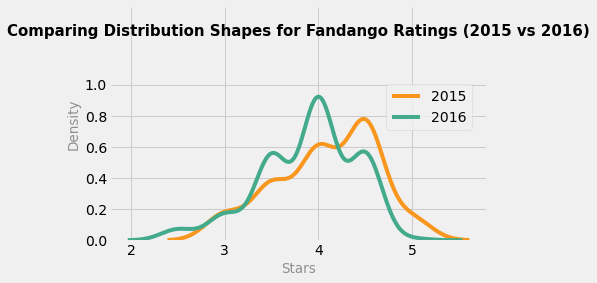

In [61]:
sns.kdeplot(fandango_2015['Fandango_Stars'], color= '#f8961e', legend= False)
sns.kdeplot(fandango_2016['fandango'], color= '#43aa8b', legend= False)

plt.xlabel('Stars', fontsize= 13.5, alpha= 0.4)
plt.ylabel('Density', fontsize= 13.5, alpha= 0.4)
plt.title('Comparing Distribution Shapes for Fandango Ratings (2015 vs 2016)', 
          weight= 'bold', y= 0.85, fontsize= 15)
plt.ylim(0,1.5)
plt.yticks(arange(0.0,1.2,0.2))
plt.legend(loc= 'best', bbox_to_anchor=(0.48, 0., 0.5, 0.7), labels=['2015', '2016'])

sns.despine(left=True, bottom=True)
plt.show()

Two aspects are striking on the figure above:

   - Both distributions are strongly left skewed.
   - The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.
### Comparing Relative Frequencies

In [17]:
fandango_2015_percent = fandango_2015['Fandango_Stars'].value_counts(normalize= True) * 100
print('fandango_2015 Percentile:' + '\n' '-' * 2,fandango_2015_percent)
fandango_2016_percent = fandango_2016['fandango'].value_counts(normalize= True) * 100
print('fandango_2016 Percentile:' + '\n' '-' * 2,fandango_2016_percent)

fandango_2015 Percentile:
-
- 4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64
fandango_2016 Percentile:
-
- 4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.
### Determining the Direction of the Change

In [18]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] #If position zero not added answer comes in float.
mode_2016 = fandango_2016['fandango'].mode()[0]

In [36]:
summary = pd.DataFrame( columns=['Mean', 'Median', 'Mode'])
summary['Mean'] = [mean_2015, mean_2016]
summary['Median'] = [median_2015, median_2016]
summary['Mode'] = [mode_2015, mode_2016]
summary.index = ['2015', '2016']
summary

,Mean,Median,Mode
2015,4.085271,4.0,4.5
2016,3.887435,4.0,4.0


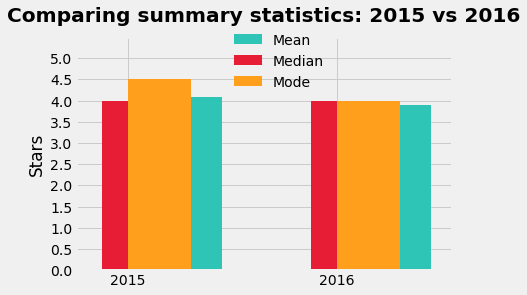

In [70]:
style.use('fivethirtyeight')


summary['Mean'].plot.bar(color = '#2ec4b6', align = 'edge', label = 'Mean', width = .45, rot = 0)
summary['Median'].plot.bar(color = '#e71d36', align = 'center', label = 'Median', width = .25,rot = 0)
summary['Mode'].plot.bar(color = '#ff9f1c', align = 'edge', label = 'Mode', width = .30, rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.04, weight= 'bold')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center', bbox_to_anchor=(0.54, 1.07))
plt.show()